# Ch7 圖解卷積神經網路(CNN)

## 7-1 影像資料的穩定性問題

## 7-2 卷積運算與池化運算

卷積神經網路的核心觀念就是卷積與池化運算

## 7-2-1 認識卷積與池化運算

卷積運算 + 池化運算 => 特徵萃取

**卷積運算**

在輸入圖片執行卷積運算前, 我們需要先定義過濾器(Filters)的濾鏡大小, 就是要找特徵.

矩陣相乘

$\begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} \begin{bmatrix}5 & 6 \\7 & 8 \end{bmatrix} = \begin{bmatrix}1*5+2*7 & 1*6+2*8 \\ 3*5+4*7 & 3*6+4*8 \end{bmatrix}  = \begin{bmatrix}19 & 22 \\43 & 50 \end{bmatrix} $ => 行 * 列

矩陣的內積

$ \begin{bmatrix}1 & 3 \\2 & 4 \end{bmatrix}. \begin{bmatrix}0 & 3 \\5 & 1 \end{bmatrix} = 1*0+3*3+2*5+4*1 = 23$

矩陣的卷積

$ \begin{bmatrix}1 & 3 \\2 & 4 \end{bmatrix} \begin{bmatrix}2 & 0 & 8 & 6 \\9 & 2 & 4 & 8 \\3 & 1 & 2 & 0 \\6 & 4 & 2 & 3 \end{bmatrix}$ --由左至右,從上到下內積--> 

$ \begin{bmatrix}1 & 3 \\2 & 4 \end{bmatrix}. \begin{bmatrix}2 & 0 \\9 & 2 \end{bmatrix} = 1*2+3*0+2*9+4*2 = 28$

$ \begin{bmatrix}1 & 3 \\2 & 4 \end{bmatrix}. \begin{bmatrix}0 & 8 \\2 & 4 \end{bmatrix} = 1*0+3*8+2*2+4*4 = 44$

,... --內積-->$\begin{bmatrix}28 & 44 & 66 \\25 & 24 & 32 \\34 & 23 & 18 \end{bmatrix}$


**銳化濾鏡**

$\begin{bmatrix}0 & -2 & 0 \\-2 & 15 & -2 \\0 & -2 & 0 \end{bmatrix}$

**邊綠化濾鏡**

$\begin{bmatrix}1 & 1 & 1 \\1 & -6 & 1 \\1 & 1 & 1 \end{bmatrix}$

**模糊濾鏡**

$\begin{bmatrix}3 & 0 & 3 \\0 & 0 & 0 \\3 & 0 & 3 \end{bmatrix}$

**上方邊線**

$\begin{bmatrix}-1 & -1 & -1 \\1 & 1 & 1 \\0 & 0 & 0 \end{bmatrix}$

**下方邊線**

$\begin{bmatrix}0 & 0 & 0 \\1 & 1 & 1 \\-1 & -1 & -1 \end{bmatrix}$

**垂直的左邊線**

$\begin{bmatrix}-1 & 1 & 0 \\-1 & 1 & 0 \\-1 & 1 & 0 \end{bmatrix}$

**垂直右邊邊線**

$\begin{bmatrix}0 & 1 & -1 \\0 & 1 & -1 \\0 & 1 & -1 \end{bmatrix}$


**池化運算**

池化運算可以壓縮和保留特徵圖的重要資訊

$\begin{bmatrix}2 & 0 & 8 & 6 \\9 & 2 & 4 & 8 \\3 & 1 & 2 & 0 \\6 & 4 & 2 & 3 \end{bmatrix}$ --最大池化法(Max Pooling)--> $\begin{bmatrix}9 & 8 \\6 & 3 \end{bmatrix}$




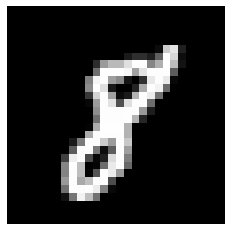

In [2]:
# Ch7_2_2.py

import numpy as np
import matplotlib.pyplot as plt

img = np.load("digit8.npy")

plt.figure()
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

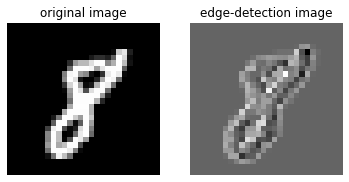

In [3]:
# Ch7_2_2.py
# P7-2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

img = np.load("digit8.npy")
edge = [
    [0, 1, 0],
    [2, -4, 1],
    [0, 1, 0]
]

plt.figure()
plt.subplot(1, 2, 1) # 一列, 二行, 第1張
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("original image")

plt.subplot(1, 2, 2)
c_digit = signal.convolve2d(img, edge, boundary="symm", mode="same")
plt.imshow(c_digit, cmap="gray")
plt.axis("off")
plt.title("edge-detection image")
plt.show()

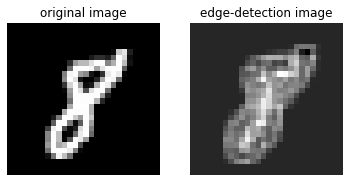

In [16]:
# Ch7_2_2.py
# 模糊濾鏡
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

img = np.load("digit8.npy")
edge = [
    [3, 0, 3],
    [0, -5, 0],
    [3, 0, 3]
]

plt.figure()
plt.subplot(1, 2, 1) # 一列, 二行, 第1張
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("original image")

plt.subplot(1, 2, 2)
c_digit = signal.convolve2d(img, edge, boundary="symm", mode="same")
plt.imshow(c_digit, cmap="gray")
plt.axis("off")
plt.title("edge-detection image")
plt.show()

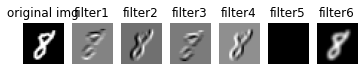

In [24]:
# Ch7_2_2.py
# 模糊濾鏡
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

img = np.load("digit8.npy")
filters = [[
    [-1, -1, -1],
    [1, 1, 1],
    [0, 0, 0]],
    [[-1, 1, 0],
    [-1, 1, 0],
    [-1, 1, 0]],
    [[0, 0, 0],
    [1, 1, 1],
    [-1, -1, -1]],
    [[0, 1, -1],
    [0, 1, -1],
    [0, 1, -1]],
    [[0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]],
    [[1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]]
]

plt.figure()
plt.subplot(1, 7, 1) # 一列, 5行, 第1張
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("original img")

for i in range(2,8):
    plt.subplot(1, 7, i)
    c = signal.convolve2d(img, filters[i-2], boundary="symm", mode="same")
    plt.imshow(c, cmap="gray")
    plt.axis("off")
    plt.title("filter"+str(i-1))

plt.show()